# Mnist CNN 구현

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [2]:
from tensorflow.compat.v1 import ConfigProto, InteractiveSession
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.4
session = InteractiveSession(config = config)

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train[:, :, :, tf.newaxis] # x_train = np.expand_dims(x_train, -1)
x_test = x_test[:, :, :, tf.newaxis]
x_train = x_train / 255
x_test = x_test / 255
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [5]:
x_train.shape

(60000, 28, 28, 1)

In [6]:
conv_mnist = keras.Sequential()

In [7]:
conv_mnist.add(keras.layers.Conv2D(32, padding='same', kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
conv_mnist.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
conv_mnist.add(keras.layers.Conv2D(64, padding='same', kernel_size=(3,3), activation='relu'))
conv_mnist.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
conv_mnist.add(keras.layers.Conv2D(128, padding='same', kernel_size=(5,5), activation='relu'))
conv_mnist.add(keras.layers.Flatten())
conv_mnist.add(keras.layers.Dense(100, activation='relu'))
conv_mnist.add(keras.layers.Dense(10, activation='softmax'))

In [8]:
conv_mnist.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               6

In [9]:
conv_mnist.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
conv_mnist.fit(x_train, y_train, batch_size=500, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3154 - accuracy: 0.9034
Epoch 2/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0599 - accuracy: 0.9814
Epoch 3/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0405 - accuracy: 0.9877
Epoch 4/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0298 - accuracy: 0.9910
Epoch 5/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0230 - accuracy: 0.9928
Epoch 6/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0173 - accuracy: 0.9947
Epoch 7/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0138 - accuracy: 0.9954
Epoch 8/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0130 - accuracy: 0.9960
Epoch 9/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0100 - accuracy: 0.9969
Epoch 10/10
60

In [11]:
y_predict = np.round(conv_mnist.predict(x_test))

In [12]:
print(y_predict.shape)
print(y_test.shape)

(10000, 10)
(10000,)


In [13]:
y_predict = y_predict.argmax(axis=1)

In [14]:
y_predict.shape

(10000,)

In [15]:
miss = np.where(y_predict != y_test)[0]
miss

array([  18,   62,   92,  247,  321,  359,  445,  448,  449,  582,  619,
        659,  674, 1014, 1039, 1112, 1182, 1226, 1232, 1242, 1319, 1414,
       1709, 1717, 1790, 1901, 2035, 2070, 2118, 2130, 2293, 2369, 2380,
       2414, 2597, 2654, 2742, 2896, 2939, 2953, 2959, 2995, 3225, 3422,
       3520, 3558, 3762, 3808, 3850, 3941, 3985, 4078, 4176, 4256, 4369,
       4443, 4497, 4504, 4536, 4571, 4740, 4761, 4823, 5937, 5997, 6173,
       6571, 6572, 6576, 6597, 6625, 6783, 8094, 8408, 9530, 9664, 9692,
       9729], dtype=int64)

In [16]:
np.size(miss)

78

In [17]:
x_test = x_test.reshape(10000, 28, 28)
x_test.shape

(10000, 28, 28)

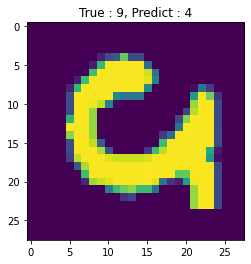

In [18]:
num = np.random.choice(miss)
plt.imshow(x_test[num])
plt.title("True : {}, Predict : {}".format(y_test[num], y_predict[num]))
plt.show()

# Fashion Mnist CNN 구현

In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist

In [20]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [21]:
x_train, x_test = x_train / 255, x_test / 255
x_train, x_test = x_train.astype('float32'), x_test.astype('float32')

In [22]:
y_dict = {
    0 : 'T-shirt/top',
    1 : 'Trouser',
    2 : 'Pullover',
    3 : 'Dress',
    4 : 'Coat',
    5 : 'Sandel',
    6 : 'Shirt',
    7 : 'Sneaker',
    8 : 'Bag',
    9 : 'Ankle boot'
}

In [23]:
x_train, x_test = np.expand_dims(x_train, -1), np.expand_dims(x_test, -1)

In [24]:
x_train.shape

(60000, 28, 28, 1)

In [25]:
fashion_model = keras.Sequential()

In [26]:
fashion_model.add(keras.layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1)))
fashion_model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
fashion_model.add(keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
fashion_model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
fashion_model.add(keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
fashion_model.add(keras.layers.Flatten())
fashion_model.add(keras.layers.Dense(100, activation='relu'))
fashion_model.add(keras.layers.Dense(10, activation='softmax'))

In [27]:
fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)              

In [28]:
fashion_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
fashion_model.fit(x_train, y_train, batch_size=500, epochs=50)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 21us/sample - loss: 0.6984 - accuracy: 0.7536
Epoch 2/50
60000/60000 [==============================] - 1s 16us/sample - loss: 0.3894 - accuracy: 0.8609
Epoch 3/50
60000/60000 [==============================] - 1s 16us/sample - loss: 0.3313 - accuracy: 0.8809
Epoch 4/50
60000/60000 [==============================] - 1s 16us/sample - loss: 0.2989 - accuracy: 0.8936
Epoch 5/50
60000/60000 [==============================] - 1s 16us/sample - loss: 0.2676 - accuracy: 0.9039
Epoch 6/50
60000/60000 [==============================] - 1s 16us/sample - loss: 0.2548 - accuracy: 0.9077
Epoch 7/50
60000/60000 [==============================] - 1s 16us/sample - loss: 0.2365 - accuracy: 0.9136
Epoch 8/50
60000/60000 [==============================] - 1s 16us/sample - loss: 0.2249 - accuracy: 0.9183
Epoch 9/50
60000/60000 [==============================] - 1s 16us/sample - loss: 0.2120 - accuracy: 0.9224
Epoch 10/50
60

In [30]:
y_predict = fashion_model.predict(x_test)

In [31]:
y_predict = y_predict.argmax(axis=1)

In [32]:
miss = np.where(y_predict != y_test)[0]
miss

array([  12,   23,   25,   42,   49,   66,   68,   89,   98,  103,  117,
        135,  141,  147,  150,  193,  239,  244,  247,  266,  271,  283,
        316,  325,  352,  368,  374,  378,  381,  382,  389,  395,  413,
        441,  452,  455,  457,  460,  474,  476,  478,  491,  495,  510,
        529,  541,  548,  600,  602,  607,  623,  634,  635,  639,  669,
        670,  688,  711,  713,  732,  753,  760,  787,  793,  830,  851,
        881,  887,  905,  909,  921,  930,  937,  939,  960,  965,  972,
        976,  977,  979,  984,  994,  997, 1000, 1005, 1025, 1055, 1056,
       1104, 1111, 1129, 1130, 1131, 1139, 1142, 1152, 1165, 1197, 1231,
       1254, 1261, 1280, 1287, 1300, 1305, 1329, 1336, 1376, 1387, 1388,
       1399, 1408, 1425, 1449, 1462, 1469, 1482, 1501, 1509, 1515, 1522,
       1527, 1533, 1557, 1572, 1602, 1620, 1626, 1629, 1632, 1640, 1642,
       1645, 1650, 1665, 1679, 1712, 1736, 1739, 1743, 1754, 1771, 1778,
       1810, 1822, 1833, 1846, 1917, 1922, 1942, 19

In [33]:
np.size(miss)

789

In [34]:
x_test = x_test.reshape(10000, 28, 28)
x_test.shape

(10000, 28, 28)

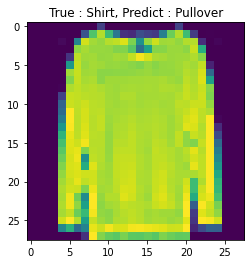

In [35]:
miss_num = np.random.choice(miss)
plt.imshow(x_test[miss_num])
plt.title("True : {}, Predict : {}".format(y_dict[y_test[miss_num]], y_dict[y_predict[miss_num]]))
plt.show()